In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.simplefilter(action = 'ignore')
data = pd.read_csv("D:\jupyter\diabetes.csv")
#读取数据值
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df = pd.DataFrame(data)
#将数据转化为DateDrame
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df = pd.DataFrame(data)
#将数据转化为DateDrame
df.describe(include='all')
#描述统计

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()
#检查是否有数据值缺失

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
print(data.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


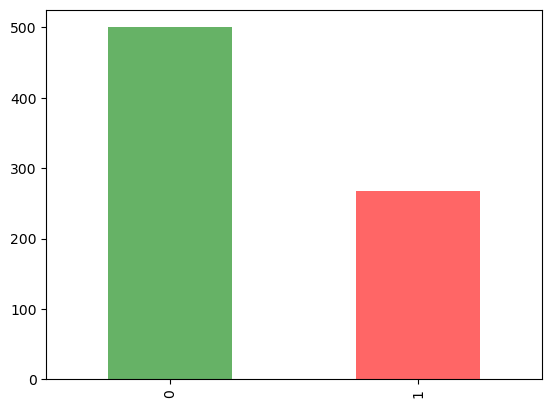

In [7]:
p = data.Outcome.value_counts().plot(kind = "bar", color = ['green' ,'red'], alpha = 0.6)

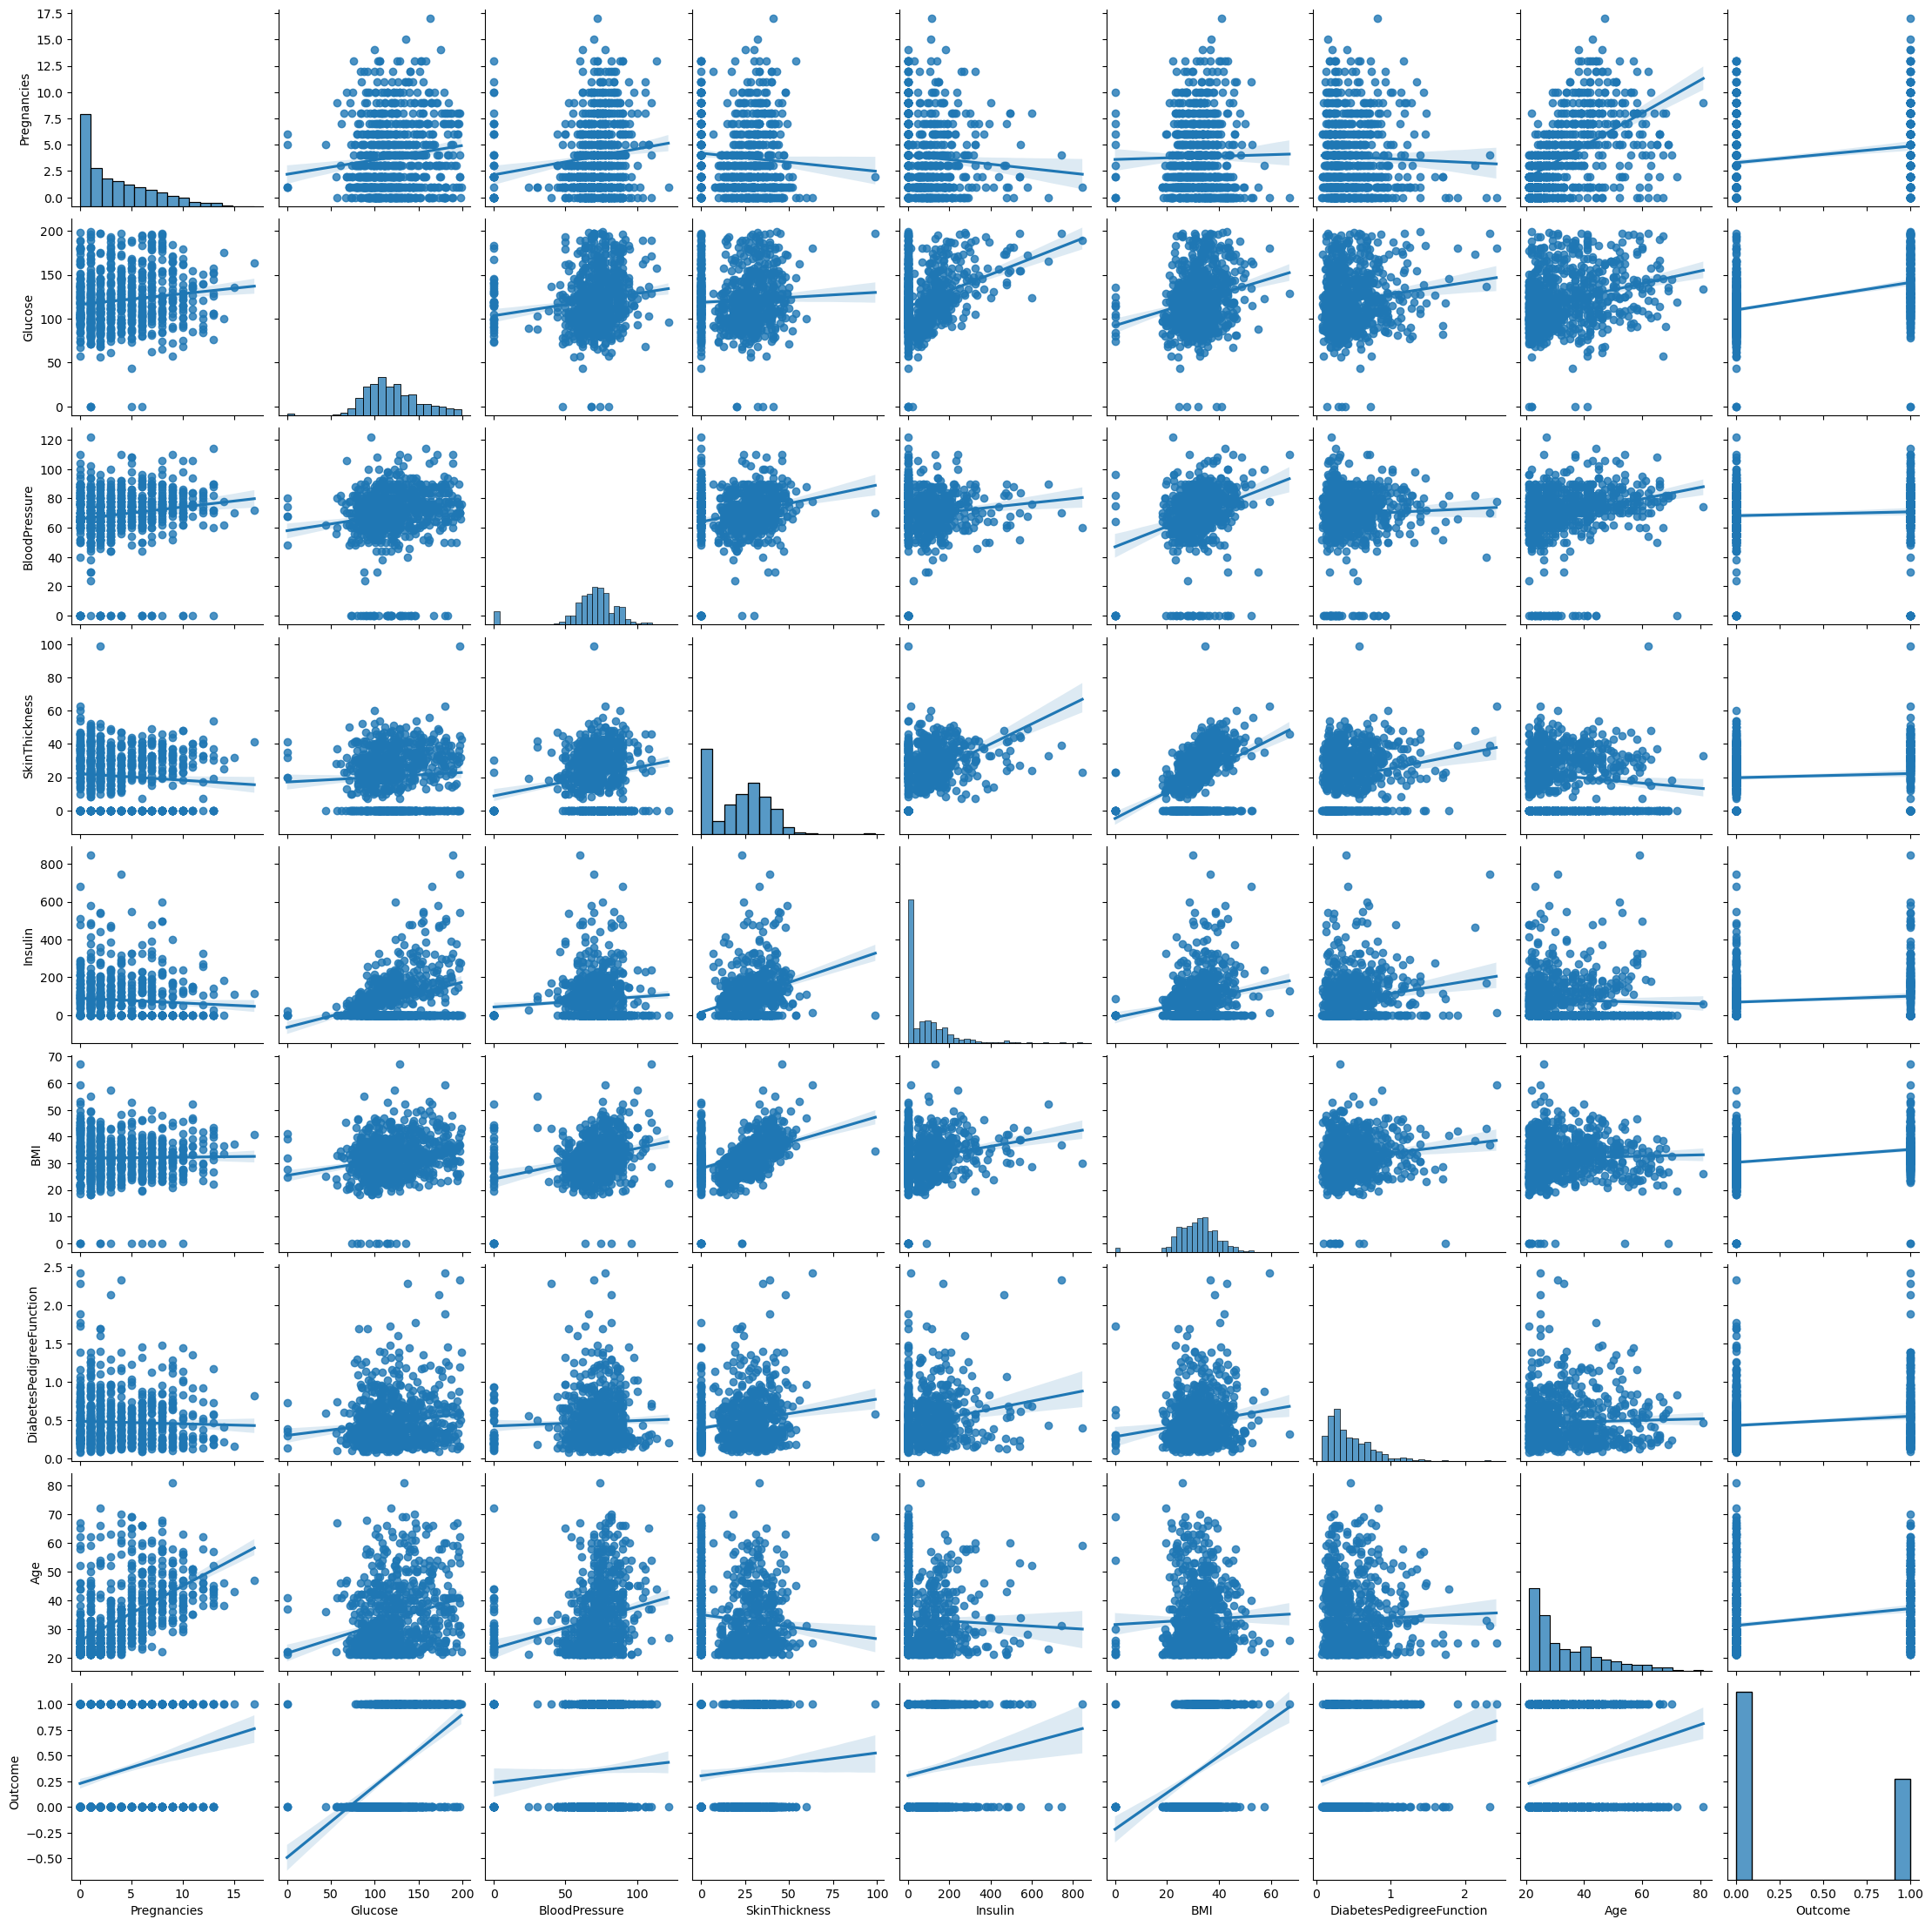

In [8]:
p = sns.pairplot(data ,kind = 'reg' ,diag_kind = 'hist')

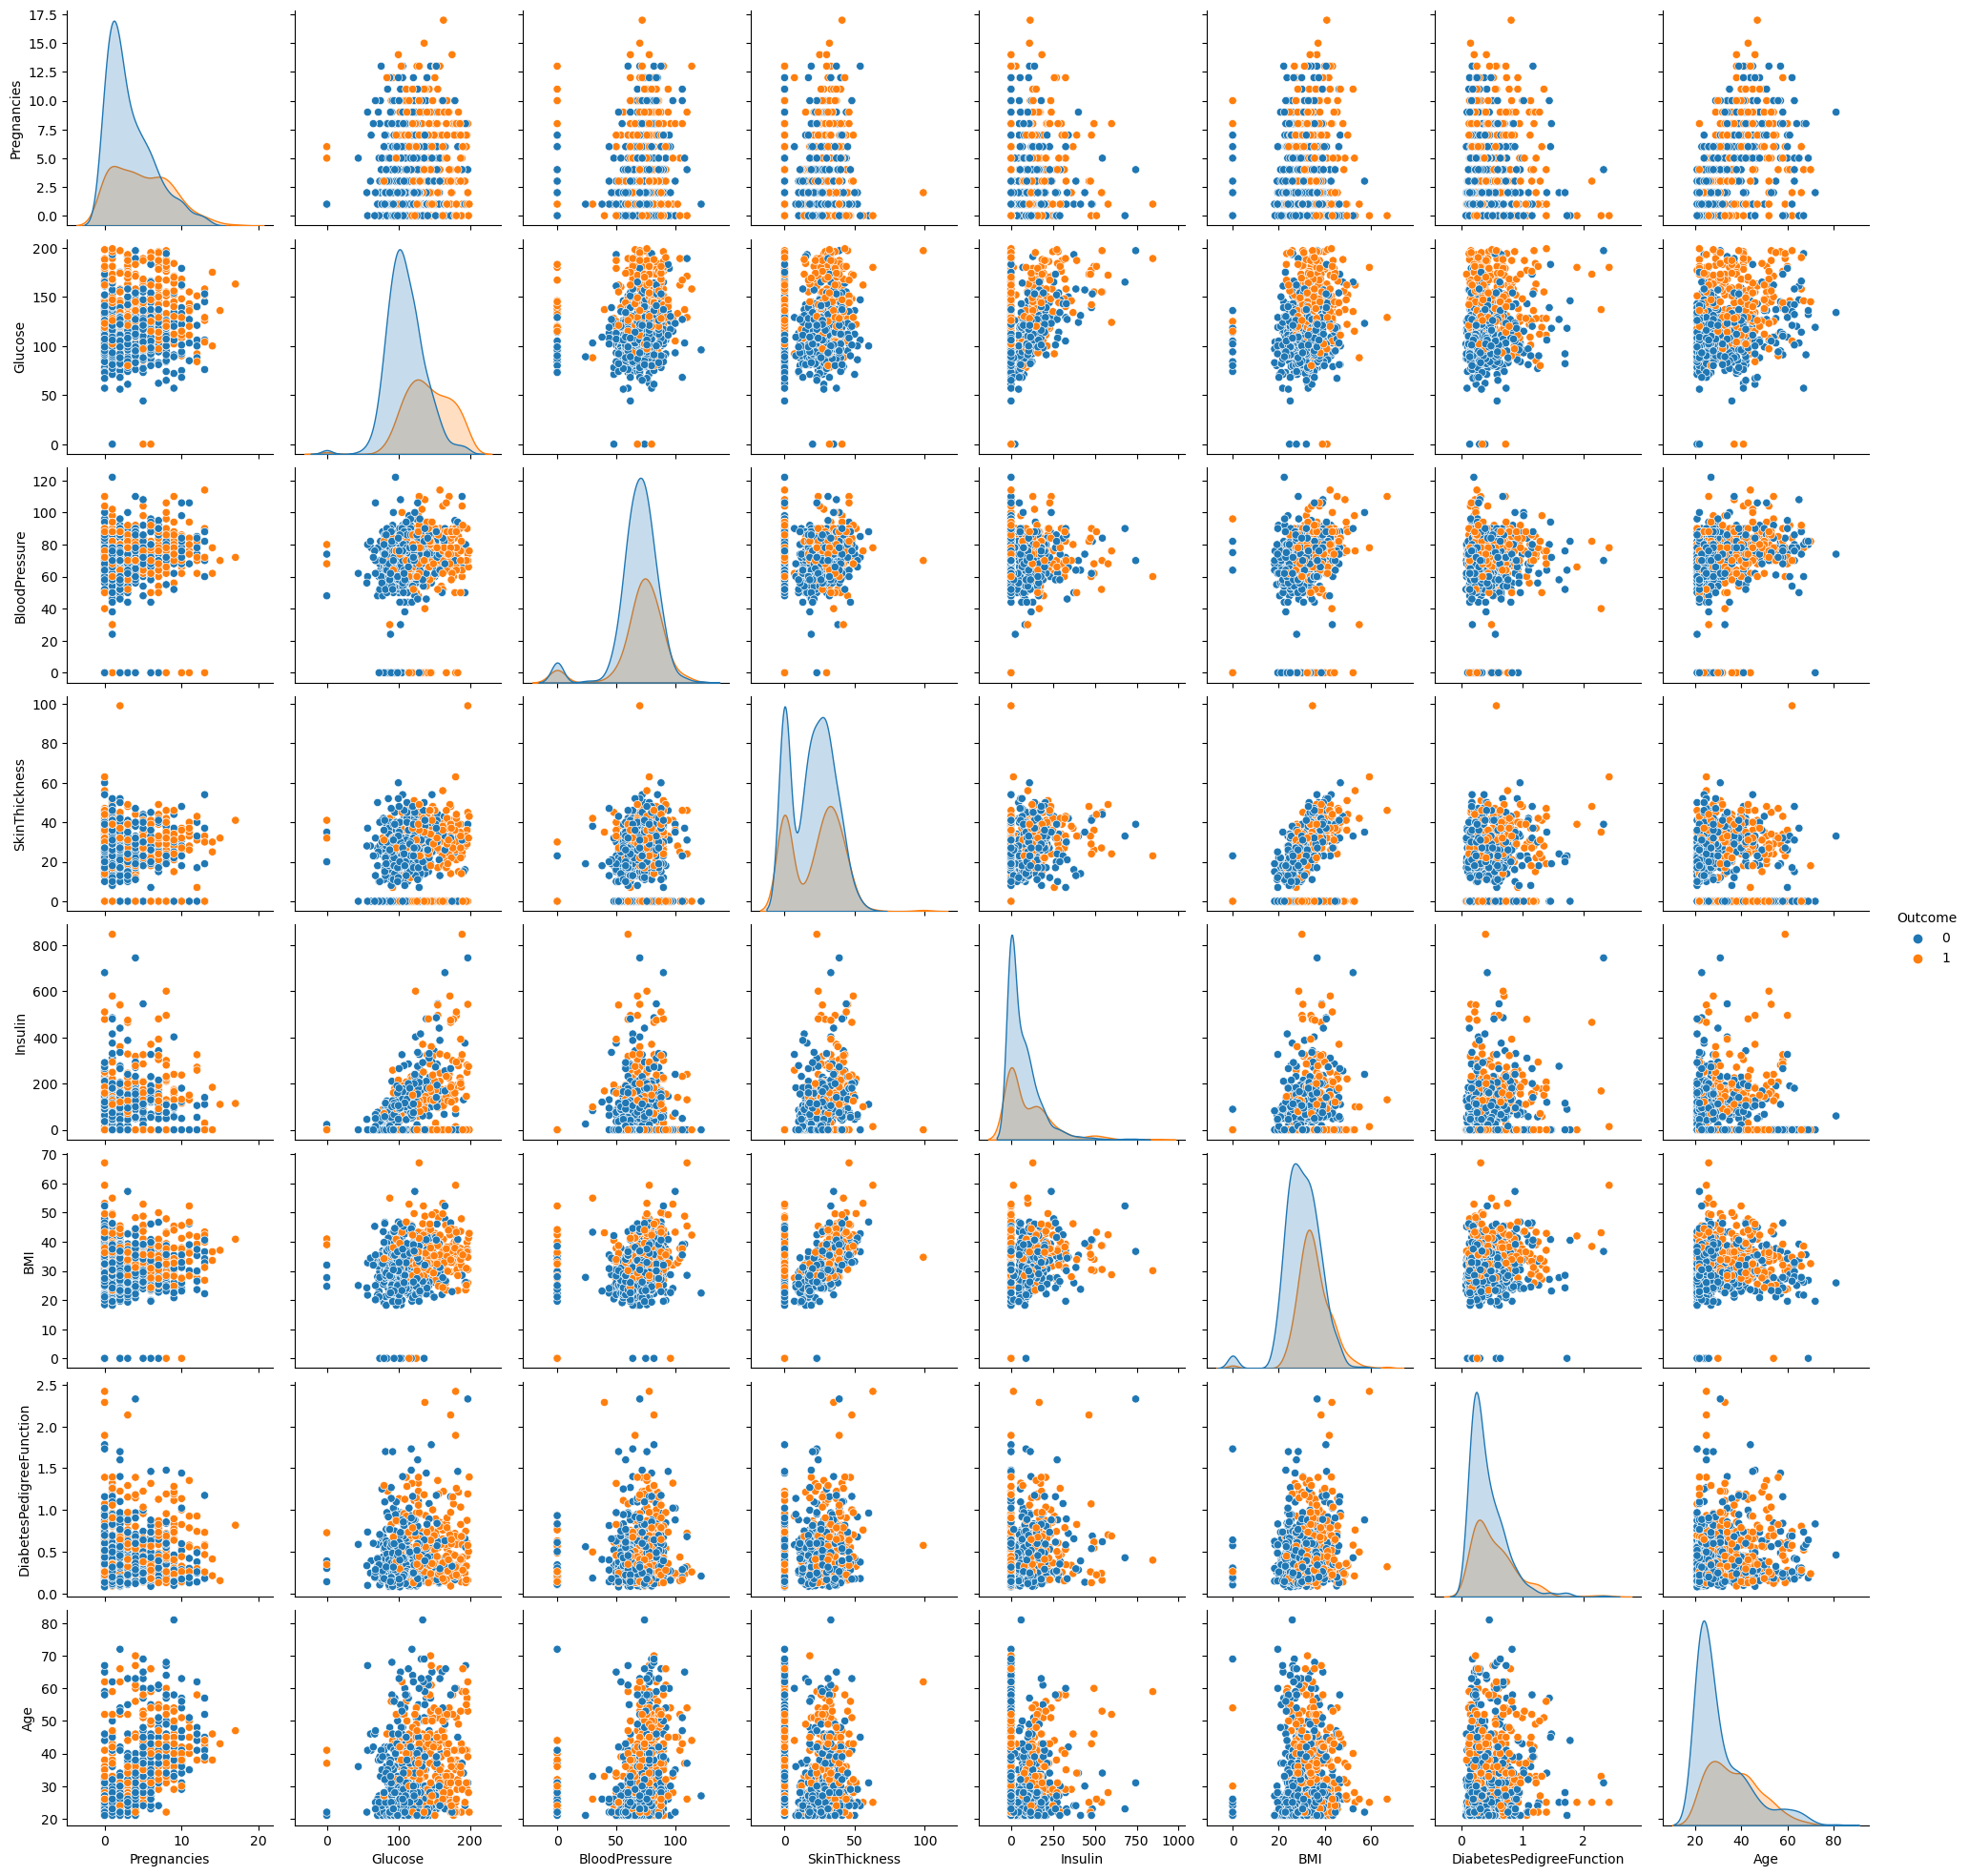

In [9]:
p = sns.pairplot(data ,hue = 'Outcome')

In [10]:
outlier = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[outlier] = data[outlier].replace(0,np.nan)
#对异常值赋予空值

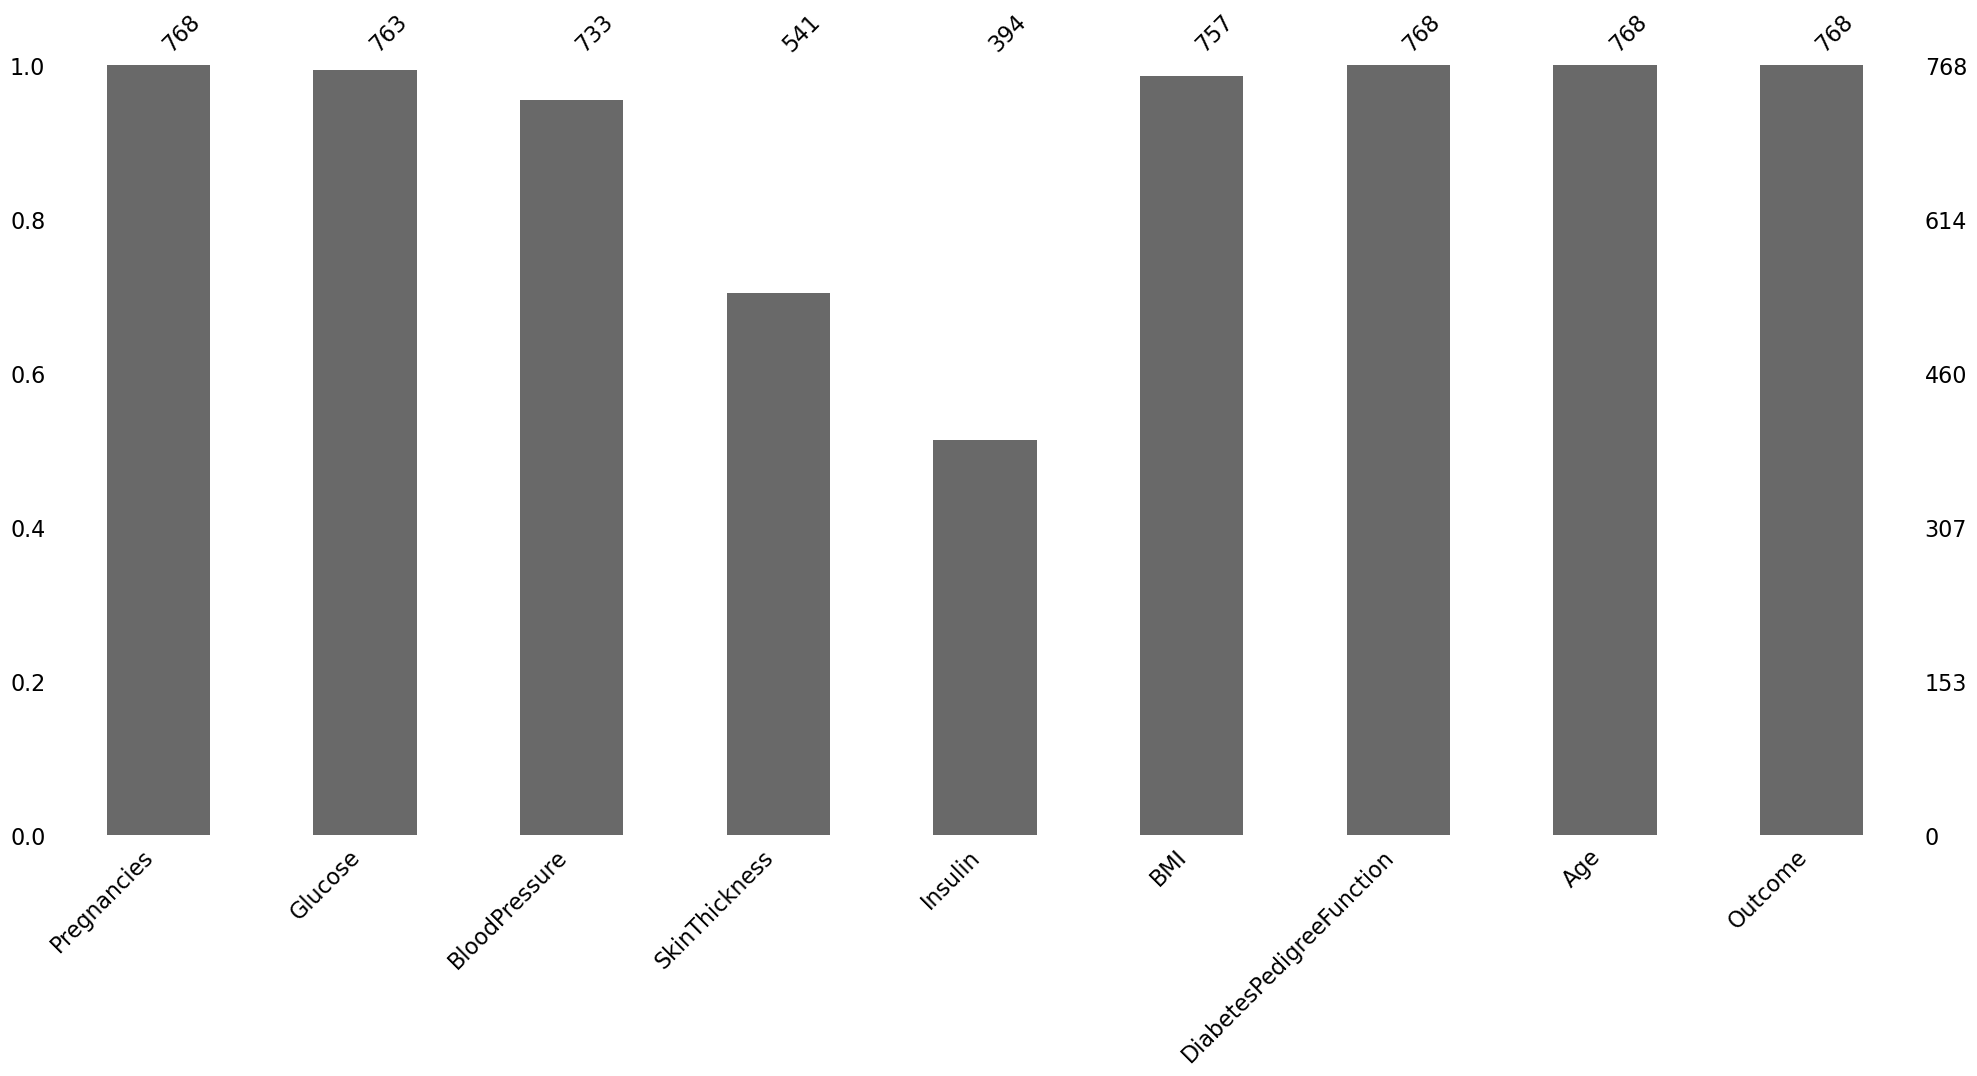

In [11]:
p = ms.bar(data)
#查看数据的空值情况

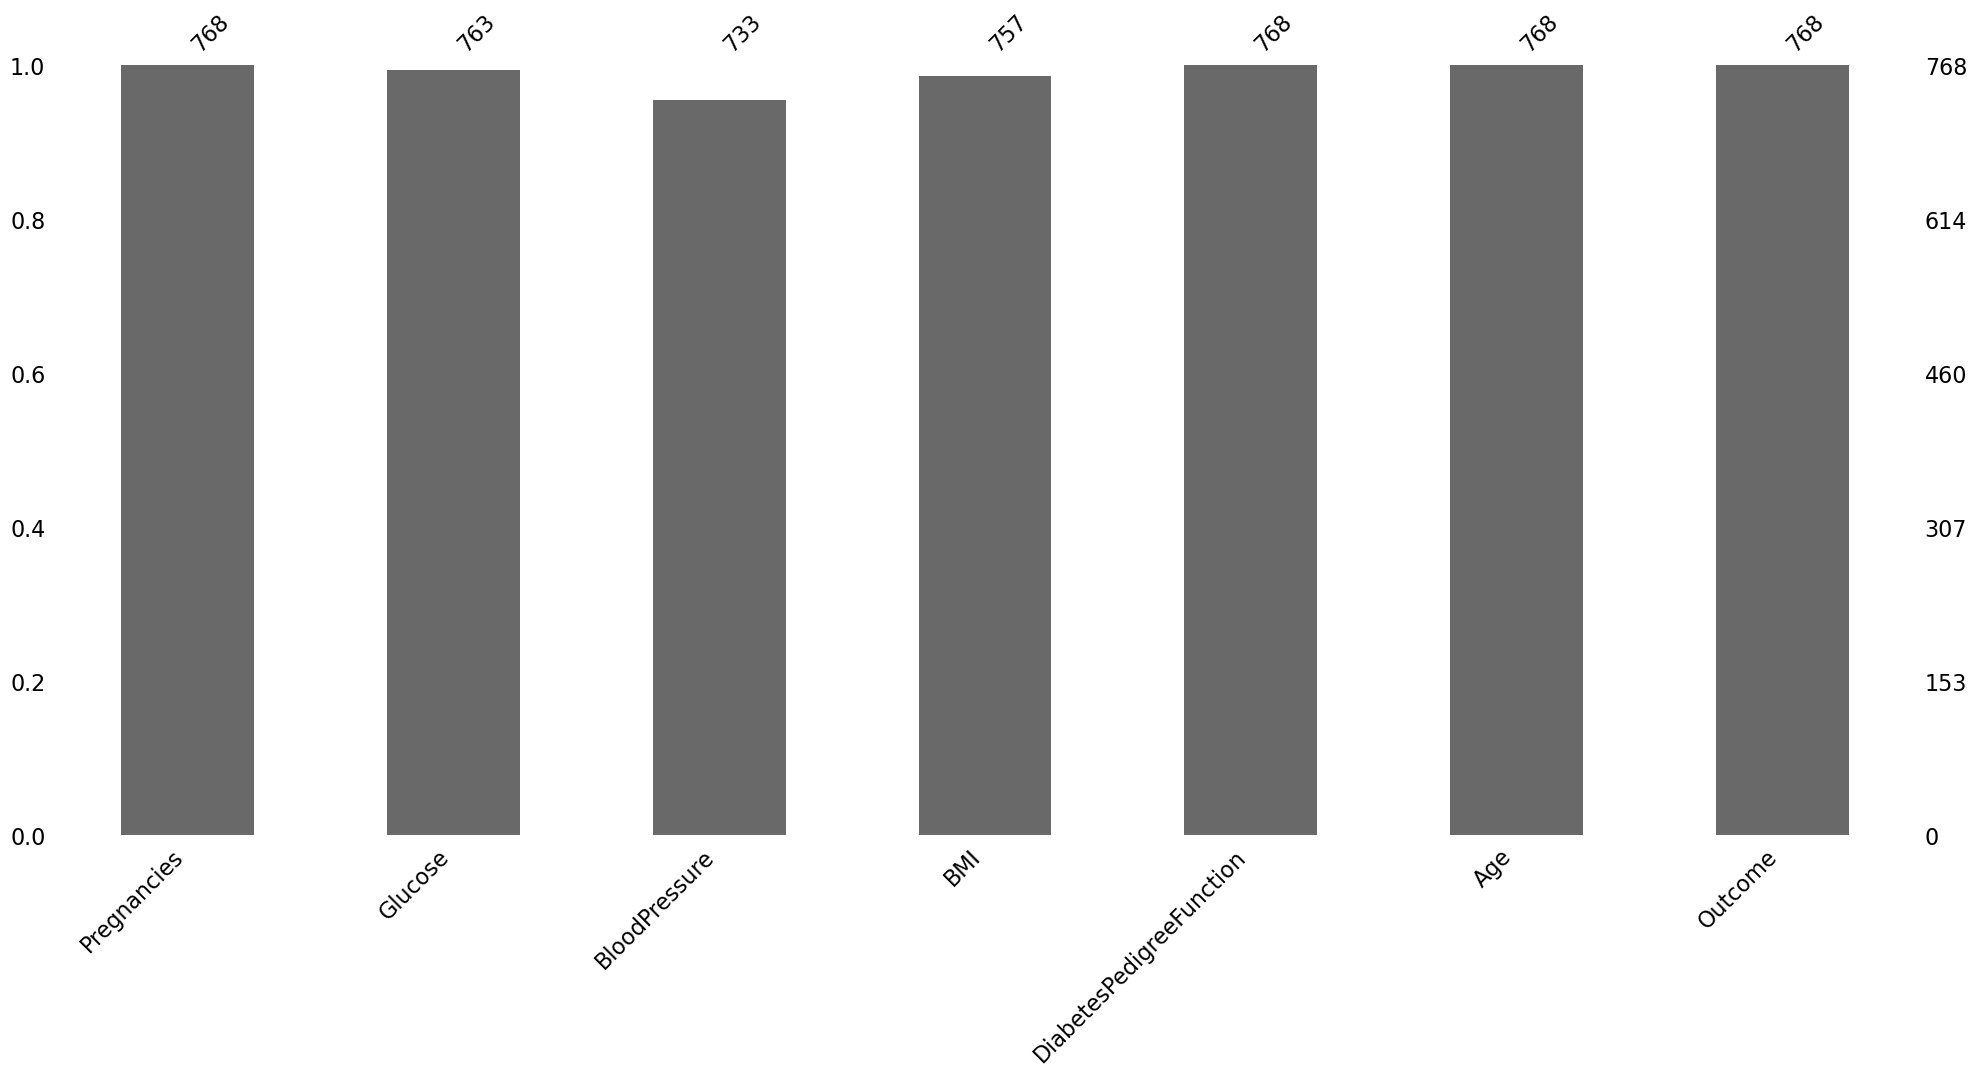

In [12]:
th_count = data.shape[0]*0.8
#设定阀值，某一列数据缺失量超过20％就会被删除
data = data.dropna(thresh = th_count ,axis = 1)
p = ms.bar(data)

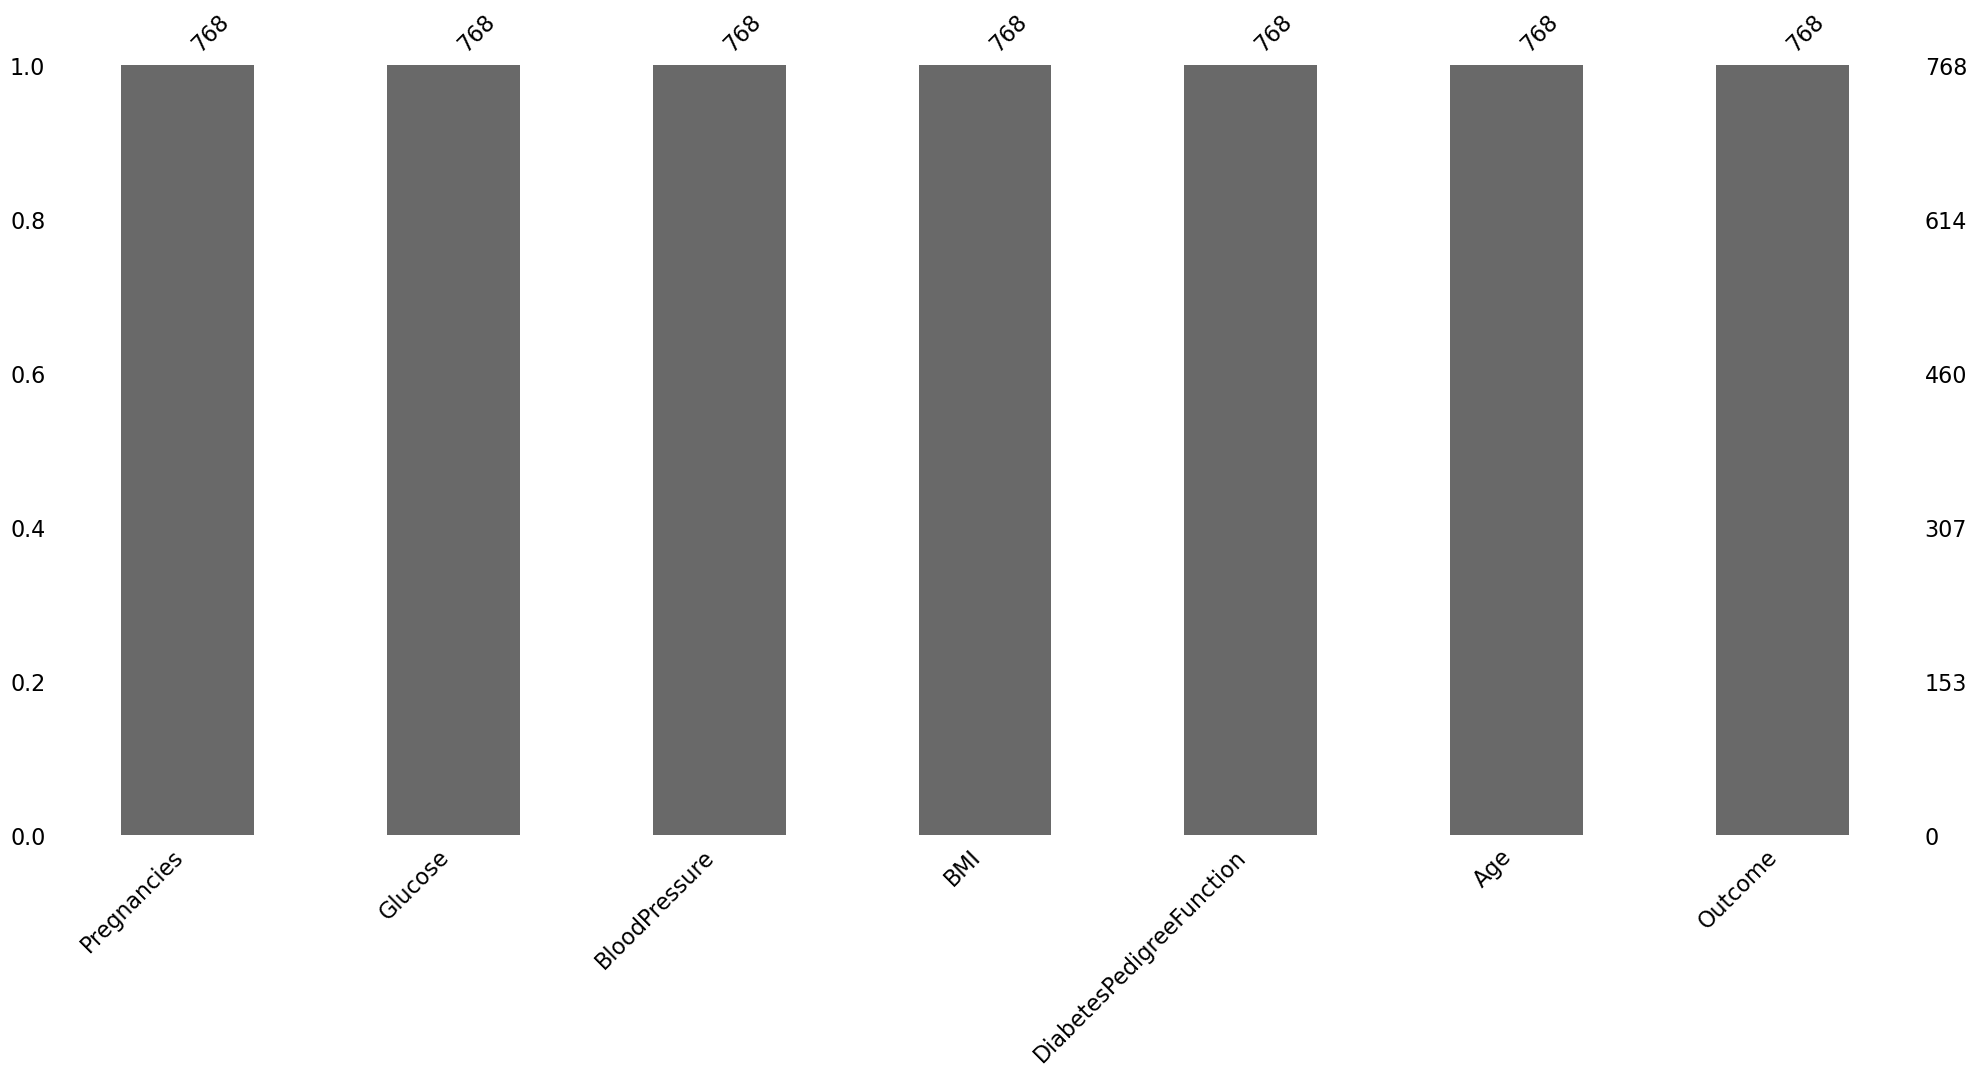

In [13]:
imp = SimpleImputer(strategy='mean')
col = ['Glucose', 'BloodPressure', 'BMI']
#对数值型变量的缺失值采用均值插补的方式填充
data[col] = imp.fit_transform(data[col])
p = ms.bar(data)

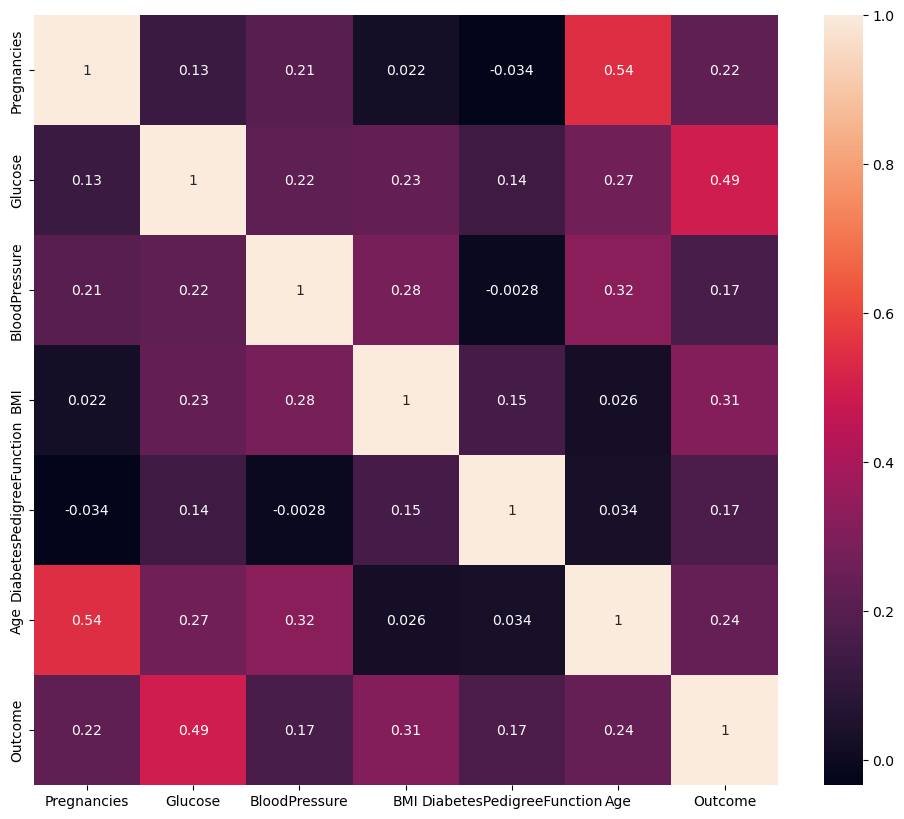

In [14]:
plt.figure(figsize = (12 ,10))
p = sns.heatmap(data.corr() ,annot = True)

In [15]:
x = pd.DataFrame(data,columns = ['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age','Pregnancies']).values
y = df.Outcome.values.reshape(-1,1)
x

array([[148.   ,  72.   ,  33.6  ,   0.627,  50.   ,   6.   ],
       [ 85.   ,  66.   ,  26.6  ,   0.351,  31.   ,   1.   ],
       [183.   ,  64.   ,  23.3  ,   0.672,  32.   ,   8.   ],
       ...,
       [121.   ,  72.   ,  26.2  ,   0.245,  30.   ,   5.   ],
       [126.   ,  60.   ,  30.1  ,   0.349,  47.   ,   1.   ],
       [ 93.   ,  70.   ,  30.4  ,   0.315,  23.   ,   1.   ]])

In [16]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y , random_state = 0,test_size = 0.3 ,stratify = y)

In [17]:
clf = KNeighborsClassifier()
clf.fit(x_train ,y_train.ravel())
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#使用默认参数进行建模测试

Accuracy: 74.03%


In [18]:
k = 3
clf = KNeighborsClassifier(k)
clf.fit(x_train ,y_train.ravel())
y_pred = clf.predict(x_test)
#选择3个样本训练模型
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.46%


In [19]:
k = 9
clf = KNeighborsClassifier(k)
clf.fit(x_train ,y_train.ravel())
y_pred = clf.predict(x_test)
#选择9个样本训练模型
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.59%


In [20]:
k = 20
Acc = np.zeros((k))
for i in range(1 ,k+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train ,y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test ,y_pred)
Acc
#计算各个K值的准确度并放进数组内

array([0.67532468, 0.72727273, 0.74458874, 0.74025974, 0.74025974,
       0.73160173, 0.72727273, 0.73160173, 0.73593074, 0.72727273,
       0.74458874, 0.74458874, 0.75324675, 0.73593074, 0.74025974,
       0.74891775, 0.74458874, 0.74891775, 0.74891775, 0.74891775])

In [21]:
print (np.min (Acc))
print (np.max (Acc))

0.6753246753246753
0.7532467532467533


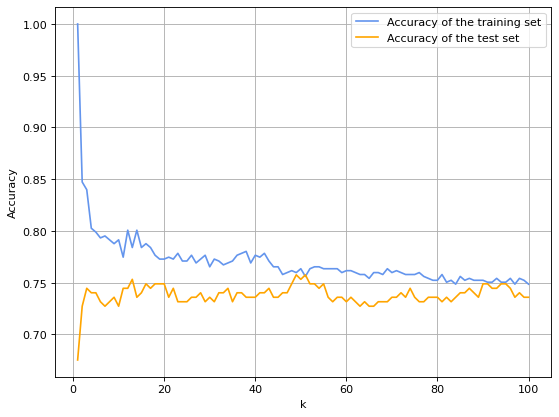

In [22]:
training_acc = []
test_acc = []
k = range(1,101)
for i in k :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit (x_train ,y_train.ravel())
    training_acc.append(knn.score(x_train ,y_train))
    test_acc .append(knn.score(x_test ,y_test))
plt.figure(figsize = (8,6) ,dpi = 80)
plt.plot(k ,training_acc ,label = 'Accuracy of the training set' ,color = 'cornflowerblue')
plt.plot(k ,test_acc ,label = 'Accuracy of the test set' ,color = 'orange')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show () 

In [23]:
k = np.argmax(test_acc)+1
clf = KNeighborsClassifier(k)
clf.fit(x_train ,y_train.ravel())
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#得出在当前数据处理下选择的最优K值的准确度

Accuracy: 75.76%


In [24]:
print(classification_report(y_pred, y_test))
#针对类别不均衡的情况，通过计算其精准度，召回率等来评判模型
#precision:精度=正确预测的个数(TP)/被预测正确的个数(TP+FP),即模型预测结果中多少是预测正确的
#recall:召回率=正确预测的个数(TP)/预测个数(TP+FN),即测试集总量中,有多少样本是预测正确的
#f1-score:F1=2*精度*召回率/(精度+召回率)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       164
           1       0.57      0.69      0.62        67

    accuracy                           0.76       231
   macro avg       0.71      0.74      0.72       231
weighted avg       0.78      0.76      0.76       231



<Axes: >

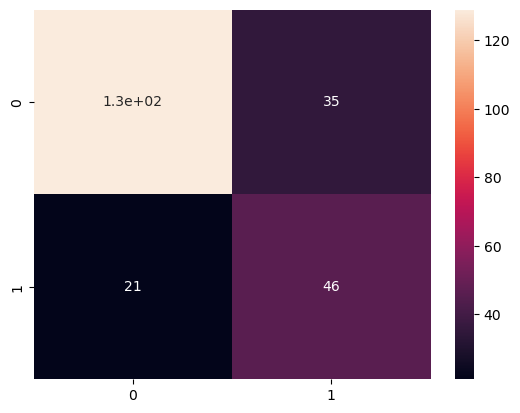

In [25]:
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True)
#混淆矩阵更能直观看出预测结果

In [26]:
gnb = GaussianNB()
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.06%


In [27]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       163
           1       0.59      0.71      0.64        68

    accuracy                           0.77       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.79      0.77      0.78       231



<Axes: >

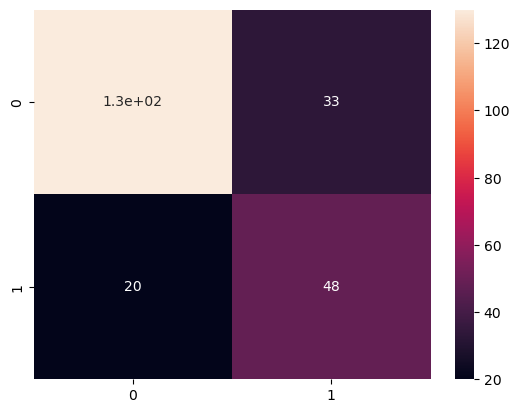

In [28]:
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True)

In [29]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.03%


最优参数以及最高得分: [105.           0.76623377]


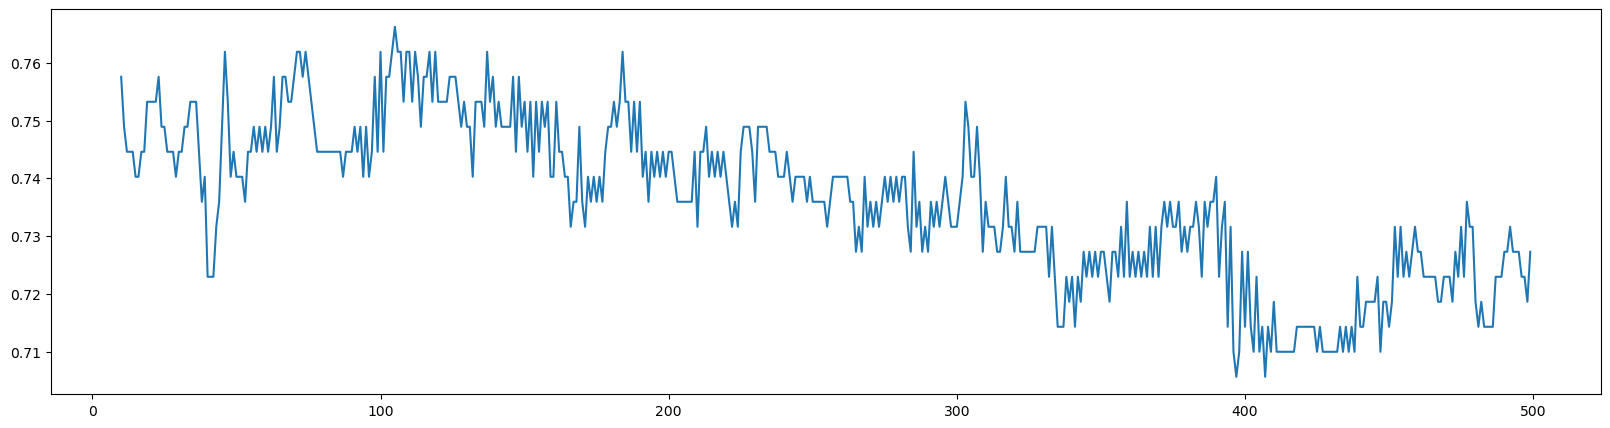

In [30]:
scoreall = []
for i in range(10,500):
    ada = AdaBoostClassifier(n_estimators = i)
    ada.fit(x_train,y_train)
    y_pred=ada.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

In [31]:
ada=AdaBoostClassifier(n_estimators = 105)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.62%


In [32]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       160
           1       0.60      0.69      0.64        71

    accuracy                           0.77       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.78      0.77      0.77       231



<Axes: >

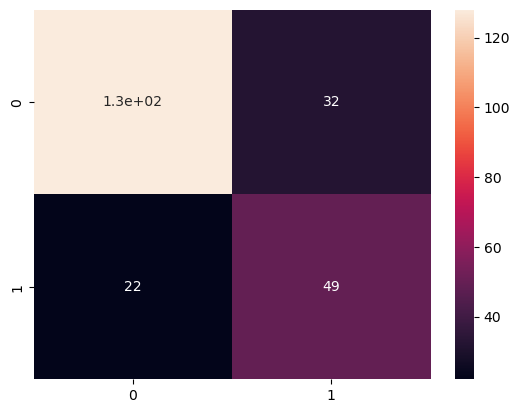

In [33]:
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True)

In [34]:
rf = rf = RandomForestClassifier(random_state = 0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.62%


In [35]:
rf = rf = RandomForestClassifier(random_state = 0, criterion = 'entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)
rf = rf = RandomForestClassifier(random_state = 0, criterion = 'gini')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 77.92%
Accuracy: 76.62%


最优参数以及最高得分: [32.          0.78787879]


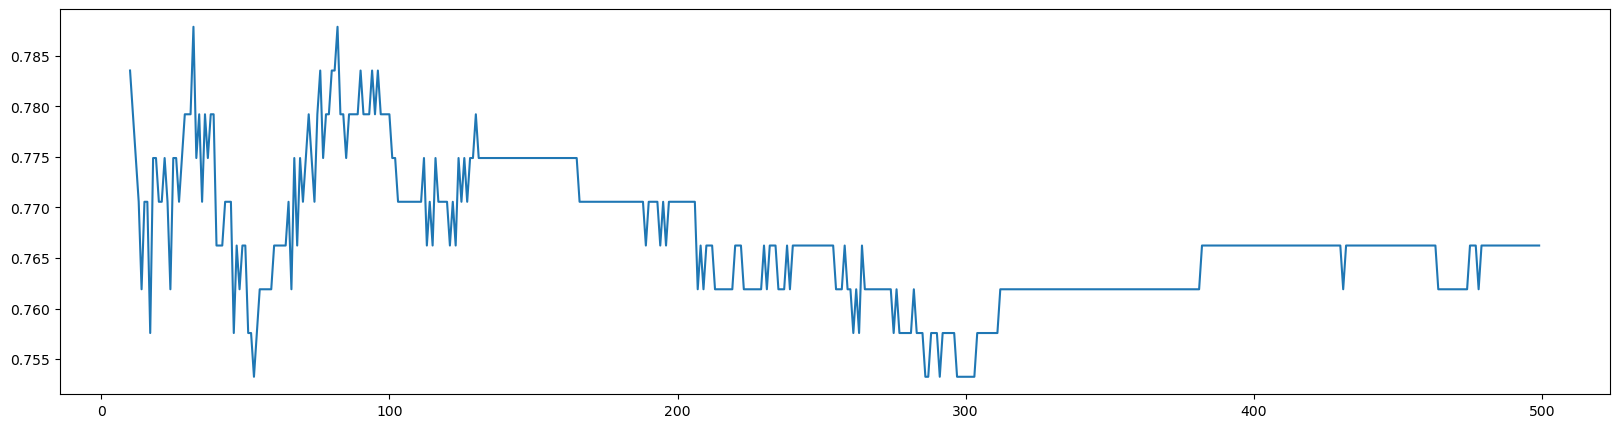

In [37]:
scoreall = []
for i in range(10,500):
    rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

最优参数以及最高得分: [21.          0.78787879]


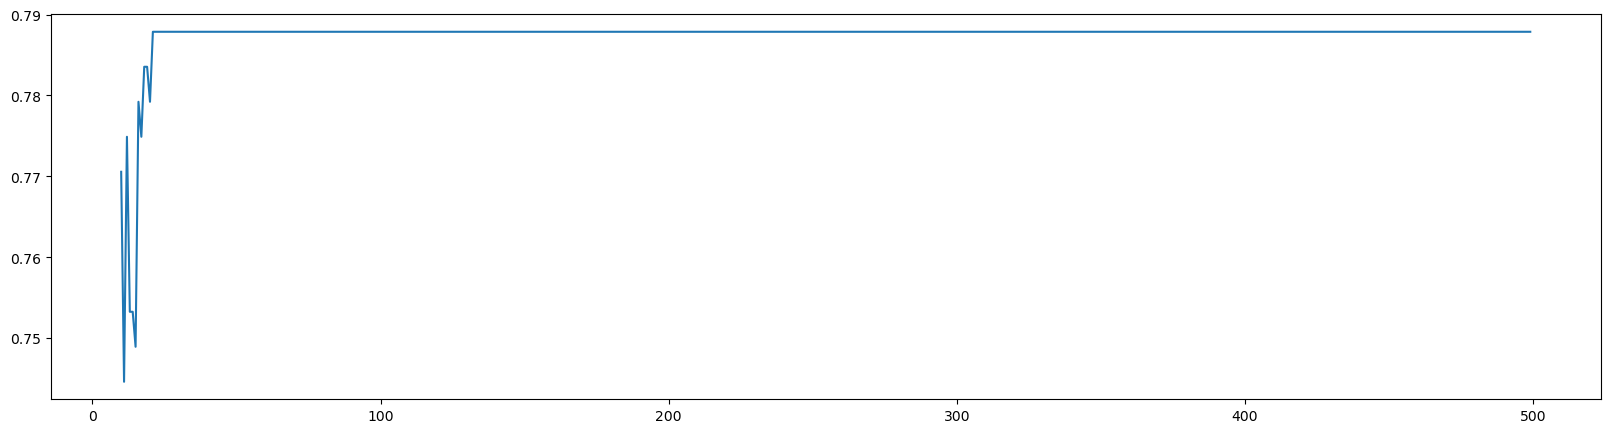

In [38]:
scoreall = []
for i in range(10,500):
    rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 32, max_depth = i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

最优参数以及最高得分: [2.         0.78787879]


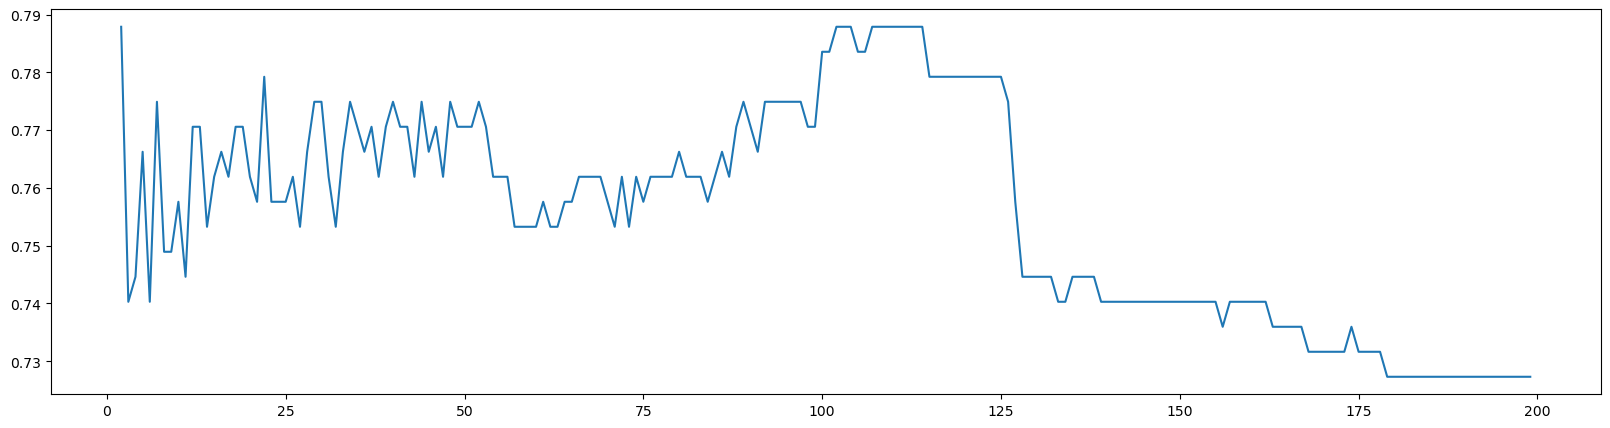

In [39]:
scoreall = []
for i in range(2,200):
    rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 32, max_depth = 21, min_samples_split = i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

最优参数以及最高得分: [12.          0.79220779]


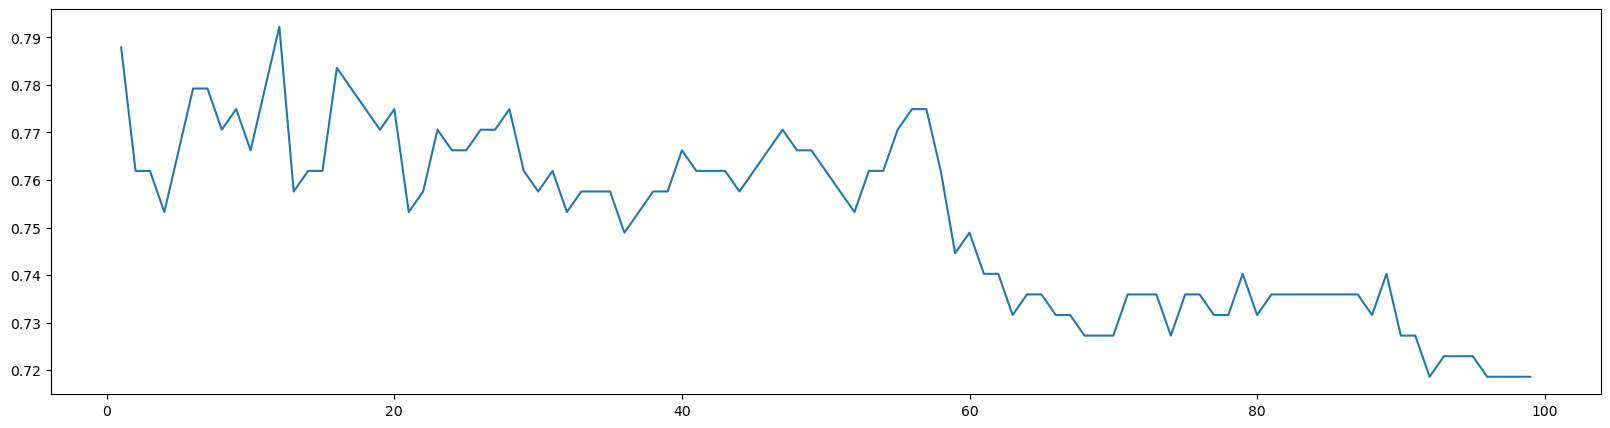

In [40]:
scoreall = []
for i in range(1,100):
    rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 32, max_depth = 21, min_samples_split = 2, min_samples_leaf = i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

In [ ]:
scoreall = []
for i in range(1,500):
    rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 32, max_depth = 21, min_samples_split = 2, min_samples_leaf = 12)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

In [41]:
rf = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 32, max_depth = 21, min_samples_split = 2, min_samples_leaf = 12)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.22%


In [42]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       166
           1       0.60      0.75      0.67        65

    accuracy                           0.79       231
   macro avg       0.75      0.78      0.76       231
weighted avg       0.81      0.79      0.80       231



<Axes: >

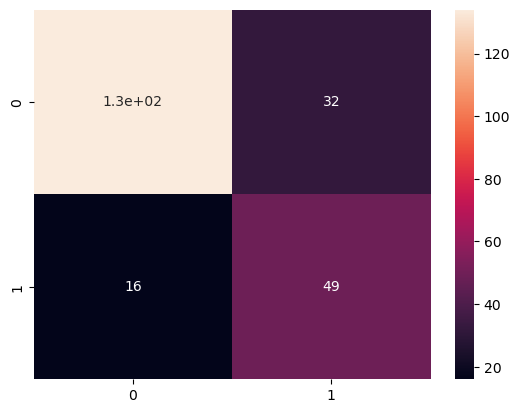

In [43]:
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True)